<a href="https://colab.research.google.com/github/Mary7Magdalene/MLL/blob/main/Building_Linear_Regression_from_scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Linear regression

y= wX +b

where Y is the dependent variable and x is the independent variable

W- Weight

B - Bias

Gradient decent:an optimization algorthm used for minimizing the loss function in various machine learning  algorthms.It is used for updating the parameters of the learning model.

w = w - a*dw

b = b- a*db

Learning rate

Is a tunin parameter in an optimization algorthm that determines the step size at each iteration while moving towards a minimum loss function.

In [1]:
import numpy as np

Linear regression model

In [107]:
class Linear_Regression():

  #initaiating the paameters:the learning rate and the number of parameters
  def __init__(self,learning_rate,no_of_iterations):

    self.learning_rate =learning_rate
    self.no_of_iterations = no_of_iterations

  def fit(self,x,Y):

#no of training examples and number of features

     self.m,self.n = x.shape# the number of rows and columns
     #initiating the weight and bias of or model
     self.w = np.zeros(self.n)
     self.b = 0
     self.x = x
     self.Y = Y

     #implementing gradient descent
     for i in range(self.no_of_iterations):
      self.update_weights()


  def update_weights(self):

    Y_prediction = self.predict(self.x)
    #calculate the gradient
    dw = -(2 * (self.x.T).dot(self.Y - Y_prediction))/self.m
    db = -2*np.sum(self.Y - Y_prediction)/self.m

    #updating the weights
    self.w = self.w - self.learning_rate*dw
    self.b = self.b - self.learning_rate*db



  def predict(self, x):

    return x.dot(self.w) + self.b

Implementing linear regression from scratch

In [108]:
import numpy as np

In [109]:
class Linear_Regression():

  #initaiating the paameters:the learning rate and the number of parameters
  def __init__(self,learning_rate,no_of_iterations):

    self.learning_rate =learning_rate
    self.no_of_iterations = no_of_iterations

  def fit(self,x,Y):

#no of training examples and number of features

     self.m,self.n = x.shape# the number of rows and columns
     #initiating the weight and bias of or model
     self.w = np.zeros(self.n)
     self.b = 0
     self.x = x
     self.Y = Y

     #implementing gradient descent
     for i in range(self.no_of_iterations):
      self.update_weights()


  def update_weights(self):

    Y_prediction = self.predict(self.x)
    #calculate the gradient
    dw = -(2 * (self.x.T).dot(self.Y - Y_prediction))/self.m
    db = -2*np.sum(self.Y - Y_prediction)/self.m

    #updating the weights
    self.w = self.w - self.learning_rate*dw
    self.b = self.b - self.learning_rate*db



  def predict(self, x):

    return x.dot(self.w) + self.b

Using linear regression model for prediction

In [110]:

#importing libraries
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

Data preprocessing

In [111]:
#loading the data from csv file to a pandas dataframe

In [112]:
salary_data = pd.read_csv('/content/Salary_Data.csv')

In [113]:
#list the first five rows of the dataset
salary_data.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [114]:
#print the number of rows and columns in the dataset
salary_data.shape

(30, 2)

In [115]:
#last five rows of the data
salary_data.tail()

,YearsExperience,Salary
25,9.0,105582.0
26,9.5,116969.0
27,9.6,112635.0
28,10.3,122391.0
29,10.5,121872.0


In [116]:
#checking for missing values
salary_data.isnull().sum()

,0
YearsExperience,0
Salary,0


In [117]:
#splitting the dataset into feature and target
x = salary_data.iloc[:,:-1].values
Y = salary_data.iloc[:,1].values

In [118]:
print(x)

[[ 1.1]
 [ 1.3]
 [ 1.5]
 [ 2. ]
 [ 2.2]
 [ 2.9]
 [ 3. ]
 [ 3.2]
 [ 3.2]
 [ 3.7]
 [ 3.9]
 [ 4. ]
 [ 4. ]
 [ 4.1]
 [ 4.5]
 [ 4.9]
 [ 5.1]
 [ 5.3]
 [ 5.9]
 [ 6. ]
 [ 6.8]
 [ 7.1]
 [ 7.9]
 [ 8.2]
 [ 8.7]
 [ 9. ]
 [ 9.5]
 [ 9.6]
 [10.3]
 [10.5]]


In [119]:
print(Y)

[ 39343.  46205.  37731.  43525.  39891.  56642.  60150.  54445.  64445.
  57189.  63218.  55794.  56957.  57081.  61111.  67938.  66029.  83088.
  81363.  93940.  91738.  98273. 101302. 113812. 109431. 105582. 116969.
 112635. 122391. 121872.]


Splitting the dataset into training and test data

In [120]:
x_train,x_test,Y_train,Y_test = train_test_split(x,Y,test_size =0.33 ,random_state =2 )



Training the linear regression model

In [136]:
model = Linear_Regression(learning_rate = 0.02, no_of_iterations = 1000)

In [137]:
model.fit(x_train,Y_train)

In [138]:
#printing the paramrter values(weigts and bias)
print('weight = ', model.w[0])
print(' bias = ',model.b)

weight =  9514.400999035135
 bias =  23697.406507136307


y =9514(x) + 23697

salry = 9514(experience) + 23697

In [139]:
#predicting the salary value for test data
test_data_prediction = model.predict(x_test)

In [140]:
print(test_data_prediction)

[ 36066.12780588  34163.24760607  66512.21100279  58900.69020357
  91249.65360029  80783.81250135 101715.49469922  52240.60950424
  42726.20850521  88395.33330058]


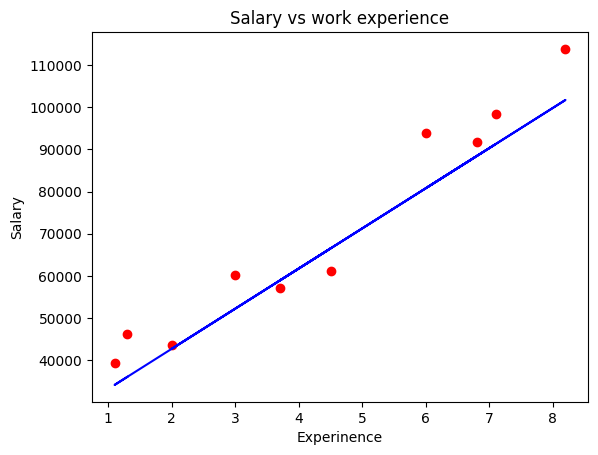

In [141]:
#visualising the pedicted values and actual values
plt.scatter(x_test,Y_test,color ='red')
plt.plot(x_test,test_data_prediction,color = 'b')
plt.xlabel('Experinence')
plt.ylabel('Salary')
plt.title('Salary vs work experience')
plt.show()